In [2]:
"""
Infant Microbiome Data: 
    ./data/otu_table_sample.csv

Growth Falter (GF) Binary Class Label:
    ./data/class_labels.csv
"""

'\nInfant Microbiome Data: \n    ./data/otu_table_sample.csv\n\nGrowth Falter (GF) Binary Class Label:\n    ./data/class_labels.csv\n'

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
# Read Microbiome Data
otu_df = pd.read_csv("./data/otu_table_sample.csv")
otu_df = otu_df.set_index('Taxa')
otu_df

,1005_B_208,1005_B_224,1007_B_186,1007_B_190,1007_B_193,1007_B_194,1007_B_199,1007_B_202,1007_B_212,1007_B_229,...,2039_B_185,2038_B_200,2038_B_180,2039_B_184,2031_B_184,2039_B_182,2029_B_207,2031_B_191,2004_B_225,1089_B_217
Taxa,,,,,,,,,,,,,,,,,,,,,
Actinobaculum_schaalii,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000238,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
Actinomyces_europaeus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.00037,0.0,0.0,0.0,0.0,0.0
Actinomyces_graevenitzii,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
Actinomyces_johnsonii,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
Actinomyces_massiliensis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mycoplasma_hominis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
Ureaplasma_parvum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
Ureaplasma_unclassified,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Check number of datapoints for each taxa in dataset
with open('datapt_cnt_per_taxa.csv','w') as f:
    for r_idx, row_sr in otu_df.iterrows():
        f.write(r_idx+': '+str(len(row_sr[row_sr.ne(0.0)]))+'\n')

In [ ]:
# Remove overly sparse features (remove rows (taxa) with less than N datapoints)

N=10
idx_to_drop=[]

for r_idx, row_sr in otu_df.iterrows():
    if len(row_sr[row_sr.ne(0.0)]) < N:
        idx_to_drop.append(r_idx)

print(len(idx_to_drop))
print(idx_to_drop[:20])

213
['Actinomyces_johnsonii', 'Actinomyces_massiliensis', 'Actinomyces_naeslundii', 'Actinomyces_oris', 'Actinomyces_viscosus', 'Mobiluncus_unclassified', 'Brevibacterium_massiliense', 'Corynebacterium_crenatum', 'Corynebacterium_glucuronolyticum', 'Corynebacterium_jeikeium', 'Corynebacterium_massiliense', 'Corynebacterium_sp_HFH0082', 'Corynebacterium_variabile', 'Kocuria_rhizophila', 'Kocuria_unclassified', 'Micrococcus_luteus', 'Rothia_dentocariosa', 'Rhodococcus_erythropolis', 'Propionibacterium_sp_KPL1844', 'Bifidobacterium_pseudolongum']


In [6]:
otu_df = otu_df.drop(index=idx_to_drop)
otu_df.shape

(231, 2996)

In [7]:
# Convert probability (sum(column)=1) to frequency

# Search for correct scaling_total_cnt value so that there are no 0s after scaling
# Dirichelet Multinomial Mixture (DMM) requires microbiome counts (frequency), but current data is proability.

col_containing_zero=[]

scaling_total_cnt = 10**7

for col_name in list(otu_df):
    tp_scaled_freq_sr = (otu_df[col_name].replace(0,pd.NA).dropna()*scaling_total_cnt).astype(int)
    # Check if there are 0s even after scaling
    has_zero = (tp_scaled_freq_sr==0).any()
    if has_zero:
        col_containing_zero.append(col_name)

# list should be empty with appropriate "scaling_total_cnt" value
print(col_containing_zero)

[]


In [8]:
# Convert data to frequency
otu_freq_df = (otu_df*scaling_total_cnt).astype(int)

### Convert OTU x Post Menstral Age (PMA) data into fixed-length timeseries data 
* PMA range: 160-347
    * Use just the PMA data in column name to create timeseries data
* Samples also has missing values (timepoints)
    * Denote missing data as 0
* Samples contain varying lengths and timepoints recordings of microbiome
    * Set all samples to a same length initially (347-160=187), then remove missing timepoints left and right

In [9]:
# Currently, all samples' data is combined in OTU data (Microbiome Taxa x infant PMA timepoints)
# Separate each sample's columns

# Create infant ids to column_names_ls dict
columns_ls = list(otu_freq_df)[1:]

id_n_site_to_col = {}
for column in columns_ls:
    # Get infant id
    try:
        idx = column.rfind('_')
        id_n_site_str = column[:idx]
    except:
        print(f"Wrong column name format:{column}. \
              Correct format: <infant id(int)>_<hospital site code(str)>_<post menstral age(int)>")
    
    # Create & collect list of column names for each infant id
    if (col_names_ls:=id_n_site_to_col.get(id_n_site_str)) is None:
            id_n_site_to_col[id_n_site_str] = col_names_ls = []
    col_names_ls.append(column)

In [10]:
# Create infant id to PMA_ls dict
id_n_site_to_pma={}
for key, col_names_ls in id_n_site_to_col.items():
    pma_ls=[]
    for col_name in col_names_ls:
        pma = int(col_name.rsplit("_",1)[-1])
        pma_ls.append(pma)
        pma_ls.sort()
    id_n_site_to_pma[key]=pma_ls

Avg number of timepoints: 11.217228464419476


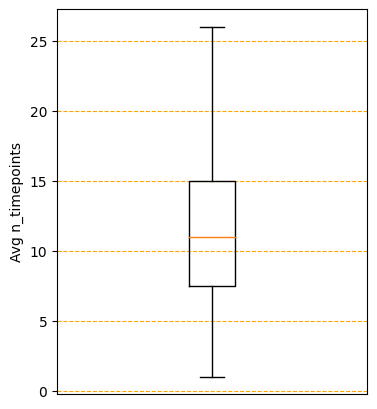

In [11]:
# Chekc average number of timepoints in all samples
len_sum = 0
cnt = 0
len_ls = []
for v in id_n_site_to_pma.values():
    len_sum+=len(v)
    cnt+=1
    len_ls.append(len(v))

print(f"Avg number of timepoints: {len_sum/cnt}")

# Box plot of n_timepoints
plt.figure(figsize=(4, 5))
plt.boxplot(len_ls)
plt.ylabel("Avg n_timepoints")
plt.xticks([])
plt.grid(visible=True,linestyle="--",color='orange')
plt.show()

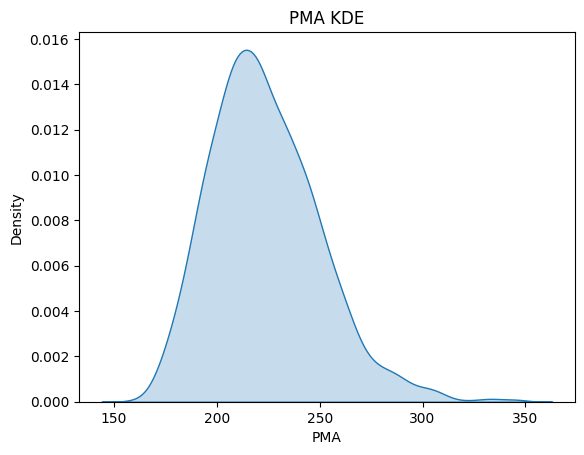

In [12]:
# Visualize PMA data w/ Kernel Density Estimation
pma_data = []
for v in id_n_site_to_pma.values():
    pma_data+=v

# Plot KDE
sns.kdeplot(pma_data, fill=True)
plt.title("PMA KDE")
plt.xlabel("PMA")
plt.ylabel("Density")
plt.show()

In [13]:
pma_stat = pd.Series(pma_data).describe()
pma_stat

count    2995.000000
mean      223.357262
std        26.603811
min       160.000000
25%       204.000000
50%       220.000000
75%       240.000000
max       347.000000
dtype: float64

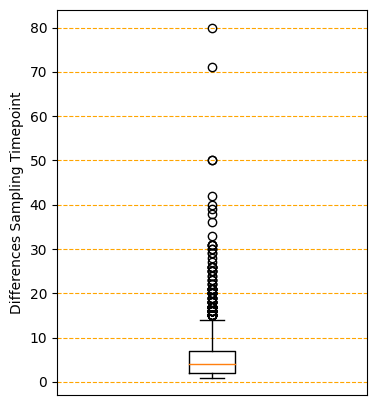

count    2728.000000
mean        5.228739
std         4.966159
min         1.000000
25%         2.000000
50%         4.000000
75%         7.000000
max        80.000000
dtype: float64

In [14]:
# Visualize how far recordings are with the difference in PMA for all timepoints & samples
tp_diff_ls=[]

pma_df = pd.DataFrame.from_dict(id_n_site_to_pma, orient='index').T
pma_df = pma_df.diff().T
for id,row_sr in pma_df.iterrows():
    tp_diff_ls+=list(row_sr.dropna().astype(int))

# Box plot of diff in sampling timepoints
plt.figure(figsize=(4, 5))
plt.boxplot(tp_diff_ls)
plt.ylabel("Differences Sampling Timepoint")
plt.xticks([])
plt.grid(visible=True,linestyle="--",color='orange')
plt.show()

pd.Series(tp_diff_ls).describe()

# we can see quite a few recordings are many days apart

### Place PMA data in slots & create timeseries data
* PMA range of [160-347] are divided into slots of user set intervals
    * Above PMA range is derived from all samples in OTU dataset
* Multiple PMA data could be assigned to same slot
* There will be slots with no PMA data

In [ ]:
# Slot size should be selected so as to
#   1. minimize the number of slots with more than 1 PMA data
#   2. minimize the number of empty slots

# *Assigning single PMA data for each slot would be ideal

def create_fixed_len_timeseries_data(id_n_site_to_pma, pma_st, pma_end, slot_size):
    """
    Returns dictionary in which 
        key = infant id 
        value = nested list with PMA data(date); missing tp denoted with 0
    
    *All dict values have same sequence length

    Sequence length determined by PMA start & end and slot size:
        timeseries size = (end - start) // slot size

    pma_st: min pma in dataset
    pma_end: max pma in dataset
    slot_size: interval size to place pma data
    report_cnt: if true, report number of slots with more than 1 PMA data
    """
    pma_slots_ls = list(range(pma_st, pma_end+slot_size, slot_size))

    id_to_fix_len_pma={}
    # loop samples
    for infant_id, pma_ls in id_n_site_to_pma.items():
                 # pma_ls => ascending order
        
        fixed_len_ls=[]
        pma_idx = 0
        slot_idx = 0
        # loop all slots
        while slot_idx < len(pma_slots_ls):
            # append list of pma for existing data
            if pma_ls[pma_idx] <= pma_slots_ls[slot_idx]: 
                
                slot=[]
                # loop & add pma while pma is smaller than slot end/max 
                while (pma_idx < len(pma_ls)) and (pma_ls[pma_idx] <= pma_slots_ls[slot_idx]):
                    slot.append(pma_ls[pma_idx])
                    pma_idx+=1

                fixed_len_ls.append(slot)
                slot_idx+=1

                if (pma_idx >= len(pma_ls)):
                    fixed_len_ls=fixed_len_ls+([0]*len(pma_slots_ls[slot_idx:]))
                    break

            # append empty list for missing data
            else: 
                fixed_len_ls.append(0)
                slot_idx+=1
        
        # create dict of timeseries data for all infants
        id_to_fix_len_pma[infant_id]=fixed_len_ls

    return id_to_fix_len_pma

slot_size = 4
id_n_site_to_fix_len_pma = create_fixed_len_timeseries_data(id_n_site_to_pma, 160, 347, slot_size)

In [16]:
# Check number of overlapping slots
# Microbiome data in overlapping slots will be averaged

def n_overlap_slots(id_n_site_to_fix_len_pma):
    """
    return count of overlapping pma data in
    all infant samples' nested pma lists 
    
    id_n_site_to_fix_len_pma (dict): infant id to nested pma 
    list with all missing timepoint data
    """
    cnt=0
    for data in id_n_site_to_fix_len_pma.values():
        if isinstance(data, list):
            for slot in data:
                if isinstance(slot,list):
                    if len(slot)>1:
                        cnt+=len(slot)
    return cnt

n_overlaps = n_overlap_slots(id_n_site_to_fix_len_pma)
print(f"Number of overlapping slots: {n_overlaps}")

Number of overlapping slots: 1125


In [17]:
# Strip 0 (missing timepoints) left and right in all samples 
# Leave missing timepoints (represented as 0) in beween non-missing data

def strip_0s(id_n_site_to_fix_len_pma):
    """
    return a dictionary where
        keys (str) = infant_id
        values (nested list) = PMA data
    
    * zeros denote missing data
    * zeros are strip left and right, while zeros in 
      between non-missing data are kept

    id_to_fix_len_pma (dict): infant id to nested pma 
    list with all missing timepoint data
    """
    id_to_varying_len_pma={}
    for infant_id, data in id_n_site_to_fix_len_pma.items():
        idx_pair=[] # start to end index pair

        # get start index
        for idx, pma in enumerate(data):
            if isinstance(pma,list):
                start_idx = idx
                idx_pair.append(start_idx)
                break
        
        # get end index
        for idx,pma in enumerate(data[::-1]):
            if isinstance(pma,list):
                end_idx = len(data)-idx
                idx_pair.append(end_idx)
                break
        
        zero_stripped_data = data[idx_pair[0]:idx_pair[1]]
        id_to_varying_len_pma[infant_id] = zero_stripped_data
    return id_to_varying_len_pma

id_to_varying_len_pma = strip_0s(id_n_site_to_fix_len_pma)

### Avg microbiome data in OTU df for those in same slot

In [18]:
# Merge slots with more than 1 PMA and return new merged df

def get_col_data(otu_freq_df, infant_id, pma):
    """
    return column data as series
    retrieve column data using infant_id and pma
    
    otu_freq_df (df): taxa x timepoint microbiome *frequency data
    infant_id (str): <infant_id>_<hospital_site>
    pma (int): post menstral age when microbiome data is collected
    """
    col_name = infant_id+"_"+str(pma)
    return otu_freq_df[col_name]

def merge_infant_microbiome_data(infant_id, id_to_varying_len_pma, otu_freq_df):
    """
    returns merged infant sample df given the infant id
    
    infant_id (str): <infant_id>_<hospital_site>
    id_to_varying_len_pma (dict): infant_id (key) : nested pma list (list)
    otu_freq_df (df): taxa x timepoint microbiome *frequency data
    """
    n_taxa = otu_freq_df.shape[0]
    taxa = otu_freq_df.index
    
    new_sample_df = pd.DataFrame()
    missing_cnt=0
    for pma_data in id_to_varying_len_pma[infant_id]:
        
        # 1. handle non-missing data
        if isinstance(pma_data,list):
            # A.handle columns that will be merged
            if len(pma_data)>1:
                for idx, pma in enumerate(pma_data):
                    if idx==0:
                        merged_sr = get_col_data(otu_freq_df, infant_id, pma)
                    else:
                        merged_sr = merged_sr + get_col_data(otu_freq_df, infant_id, pma)
                
                merged_sr = np.ceil(merged_sr/len(pma_data)).astype(int)
                
                # set new column name
                merged_sr.name = infant_id+'_'+'_'.join([str(x) for x in pma_data])

                # add merged_sr to df
                new_sample_df = pd.concat([new_sample_df, merged_sr],axis=1)

            # B.handle columns that will not be merged
            else:
                pma_sr = otu_freq_df[infant_id+'_'+str(pma_data[0])]
                # add pma_sr to df
                new_sample_df = pd.concat([new_sample_df, pma_sr],axis=1)
        
        # 2. handle missing data; denoted wiht col name with no pma
        else: 
            missing_sr = pd.Series([0]*n_taxa, name=infant_id+'_NA'+str(missing_cnt), index=taxa)
            new_sample_df = pd.concat([new_sample_df, missing_sr], axis=1)
            missing_cnt+=1
            
    return new_sample_df

def merge_all_infant_microbiome_data(id_to_varying_len_pma, otu_freq_df):
    """
    return infant microbiome timeseries data in which 
    columns are merged if PMAs are grouped in a single slot.

    id_to_varying_len_pma (dict): infant_id (key) : nested pma list (list)
    otu_freq_df (df): taxa x timepoint microbiome *frequency data
    """
    merged_data_df = pd.DataFrame()

    for infant_id in id_to_varying_len_pma.keys():
        merged_infant_df = merge_infant_microbiome_data(infant_id, id_to_varying_len_pma, otu_freq_df)
        merged_data_df = pd.concat([merged_data_df, merged_infant_df],axis=1)
    
    return merged_data_df

In [19]:
merged_otu_df = merge_all_infant_microbiome_data(id_to_varying_len_pma, otu_freq_df)

In [20]:
# Save output
merged_otu_df.to_csv('data/merged_otu.csv', index_label='Taxa')